HW1 Linear Regression

Linear Regression을 matrix 연산을 사용하여 구한다.

-> y = ax+b+N(0,d2) 을 활용하여 데이터를 생성한다.

-> x는 일정 범위 내에서 uniform distribution을 가정하여도 되고 또 다른 정규 분포에 따라 생성해도 된다. 

-> matrix 연산을 활용하여 a,b를 추정하고 이를 원식과 비교하는 그래프를 작성한다. 

-> x의 개수를 변화시켜 3번 이상 실험을 반복한다.

In [84]:
import numpy as np
import matplotlib.pyplot as plt


def data(a, b, x_size, noise, sigma):
    # y=ax+b
    x = np.array(range(-25, 25))
    y = a*x + b
    
    uniform_x = np.random.uniform(low=-abs(noise), high=abs(noise), size=x_size)
    mu, sigma = 0.0, sigma
    rand_norm = np.random.normal(mu, sigma, size=uniform_x.shape[0])
    data_x = uniform_x.reshape(-1, 1)
    data_y = uniform_x*a + b + rand_norm
    data_y = data_y.reshape(-1, 1)
    
    np.random.seed(0)
    estimated_w = np.dot(np.transpose(data_x), data_x)
    estimated_w = np.dot(np.linalg.inv(estimated_w), np.transpose(data_x))
    estimated_w = np.dot(estimated_w, data_y)
    estimated_w = estimated_w[0][0]
    w0 = np.mean(data_y) - np.mean(np.dot(data_x, estimated_w))

    plt.xlabel('x axis')
    plt.ylabel('y axis')
    plt.grid(color='gray', alpha=.5, linestyle='--')
    plt.plot(x, y, color='black', label=f"y={a}x+{b}")
    plt.scatter(uniform_x, uniform_x*a + b + rand_norm, color='darkmagenta', s=10)
    plt.plot(x, estimated_w*x+w0, color='red')
    plt.legend()
    plt.show()
    
    return estimated_w, w0

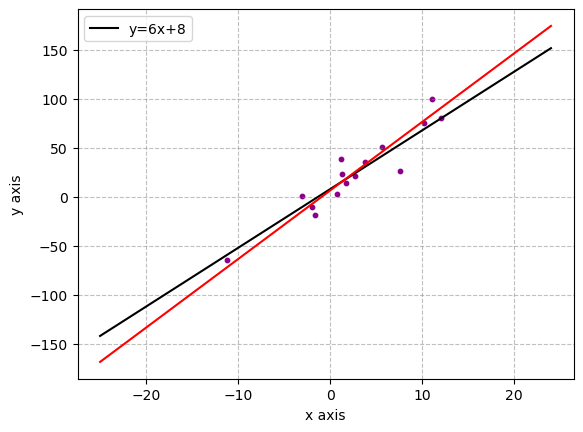

In [85]:
a, b = data(6, 8, 15, 13, 17.0)
print(f"estimated_a : {a}, estimated_b : {b}")

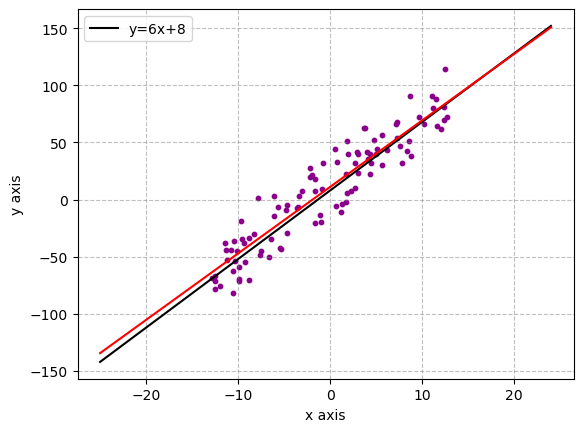

In [86]:
a, b = data(6, 8, 100, 13, 17.0)
print(f"estimated_a : {a}, estimated_b : {b}")

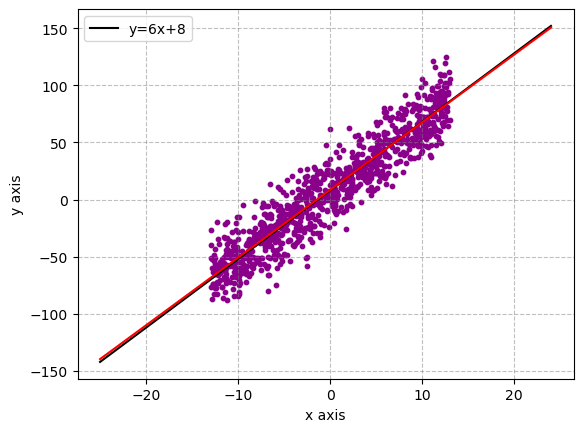

In [87]:
data_x, data_y = data(6, 8, 1000, 13, 17.0)